In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
df=pd.read_csv(r"C:\Users\Acer\Downloads\houseprice_150_rows.csv")

In [70]:
df.head(4)

,Id,Location,Bedrooms,Bathrooms,Size_sqft,Year_Built,Garage,Floors,Has_Basement,Nearby_Schools,Crime_Rate,Transport_Access,Price
0,1,Philadelphia,4,4,1448,2010,1,1,1,5,2.38,4,278718
1,2,Philadelphia,4,1,3488,1990,2,1,0,3,2.50,5,350904
2,3,Chicago,2,4,2132,1976,1,2,0,3,1.08,5,899739
3,4,San Antonio,5,2,989,1983,2,3,1,1,4.00,1,456638


In [71]:
df = df.drop(columns=["Id", "Location"])

In [72]:
df.head(4)

,Bedrooms,Bathrooms,Size_sqft,Year_Built,Garage,Floors,Has_Basement,Nearby_Schools,Crime_Rate,Transport_Access,Price
0,4,4,1448,2010,1,1,1,5,2.38,4,278718
1,4,1,3488,1990,2,1,0,3,2.50,5,350904
2,2,4,2132,1976,1,2,0,3,1.08,5,899739
3,5,2,989,1983,2,3,1,1,4.00,1,456638


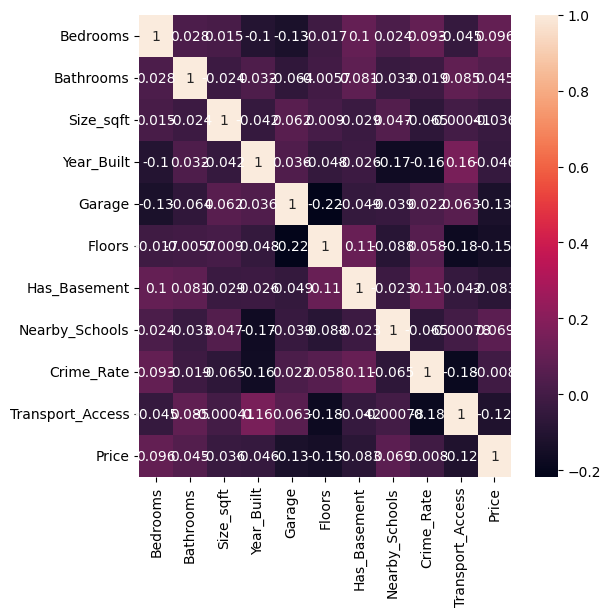

In [73]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [74]:
x = df.iloc[:,:-1]
y = df["Price"]

In [75]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Bedrooms,Bathrooms,Size_sqft,Year_Built,Garage,Floors,Has_Basement,Nearby_Schools,Crime_Rate,Transport_Access
0,0.687746,1.266743,-0.986728,1.093712,-0.016171,-1.331609,0.986754,1.440807,-0.512665,0.732102
1,0.687746,-1.336153,1.067109,0.180764,1.196666,-1.331609,-1.013423,0.032852,-0.410223,1.440588
2,-0.829341,1.266743,-0.298088,-0.458300,-0.016171,-0.059371,-1.013423,0.032852,-1.622452,1.440588
3,1.446290,-0.468521,-1.448841,-0.138768,1.196666,1.212867,0.986754,-1.375102,0.870301,-1.393355
4,-0.829341,0.399111,0.038177,1.093712,-0.016171,-0.059371,0.986754,-1.375102,1.519100,1.440588
...,...,...,...,...,...,...,...,...,...,...
145,-0.070797,-1.336153,0.442904,1.002417,1.196666,-0.059371,0.986754,1.440807,-0.154118,0.023616
146,-0.070797,-1.336153,-1.621001,0.409001,1.196666,-0.059371,0.986754,0.032852,1.519100,-0.684870
147,0.687746,-1.336153,1.096306,-0.732185,-0.016171,-1.331609,-1.013423,-0.671125,0.008082,-0.684870
148,-0.070797,-0.468521,-0.959544,0.682886,-0.016171,-1.331609,-1.013423,1.440807,-1.016338,-1.393355


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression , Lasso ,Ridge

LinearRegression

In [78]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

-7.3540634200004895

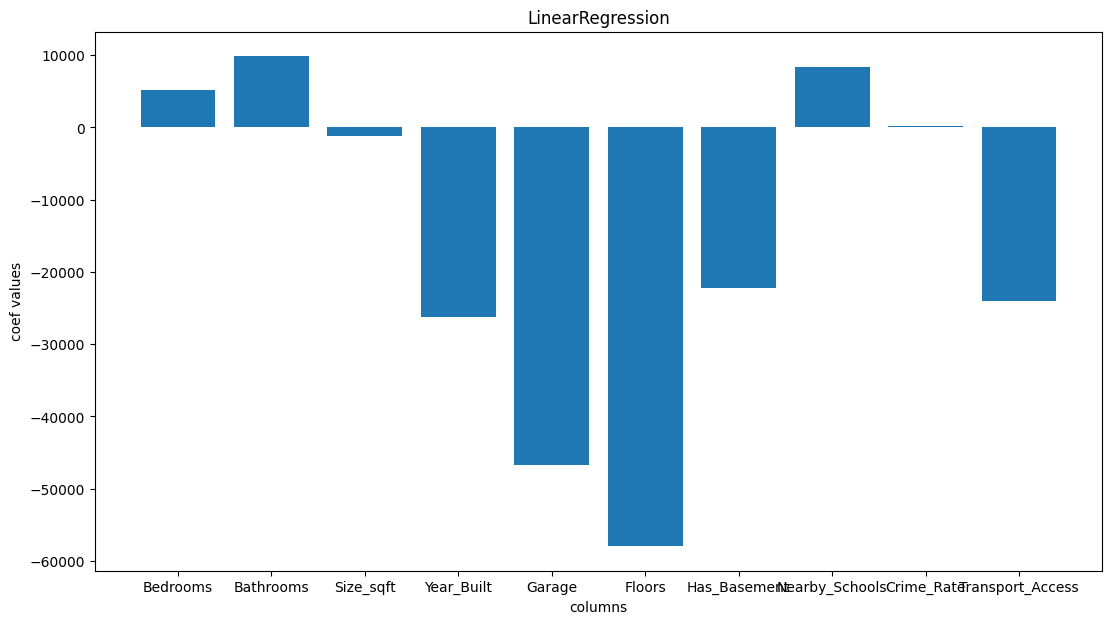

In [79]:
plt.figure(figsize=(13,7))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef values")
plt.show()

#Lasso

In [80]:
ls=Lasso(alpha=10)
ls.fit(x_train,y_train)
ls.score(x_test,y_test)*100

-7.3542856228129505

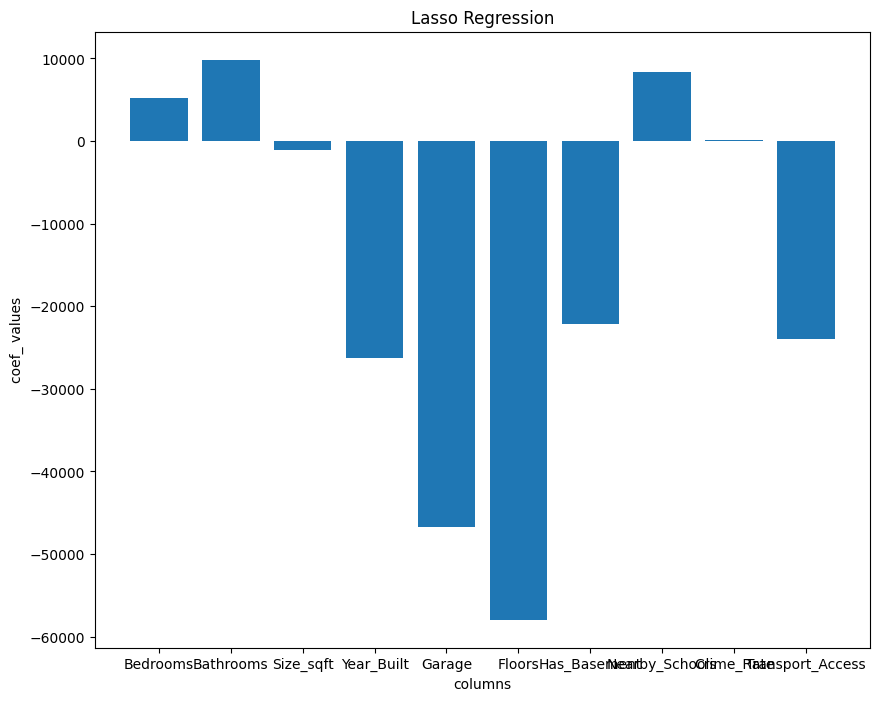

In [81]:
plt.figure(figsize=(10,8))
plt.bar(x.columns,ls.coef_)
plt.title("Lasso Regression")
plt.xlabel("columns")
plt.ylabel("coef_ values")
plt.show()

#Ridge

In [82]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

-6.442325257949322

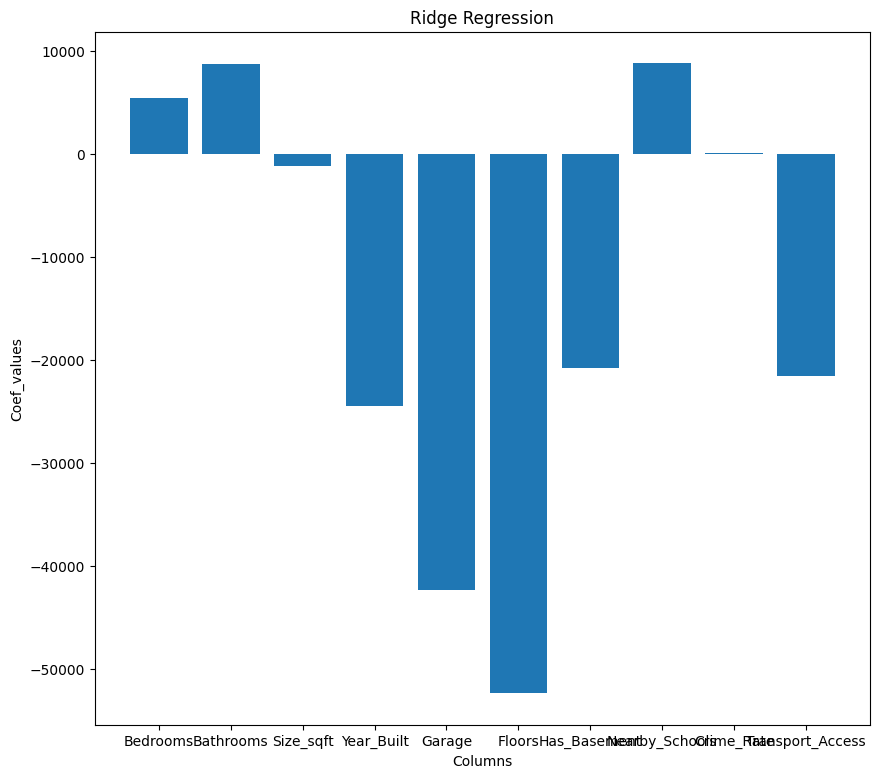

In [83]:
plt.figure(figsize=(10,9))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge Regression")
plt.xlabel("Columns")
plt.ylabel("Coef_values")
plt.show()

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [88]:
#Linear Regression Model
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

69204482009.6444
223983.67493574333
263067.44764345966


In [89]:
#Loose Model
print(mean_squared_error(y_test,ls.predict(x_test)))
print(mean_absolute_error(y_test,ls.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ls.predict(x_test))))

69204625249.9657
223987.0550356175
263067.7198935014


In [90]:
#Ridge Model
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

68616741171.30906
223881.54334379628
261947.97416912593


In [92]:
df1=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":ls.coef_,"Ridge":ri.coef_})
df1

,col_name,LinearRegression,Lasso,Ridge
0,Bedrooms,5153.858708,5146.701757,5436.138021
1,Bathrooms,9856.607194,9842.970971,8720.367074
2,Size_sqft,-1141.631467,-1132.090316,-1158.349833
3,Year_Built,-26265.713889,-26261.405563,-24465.088105
4,Garage,-46698.748945,-46690.541139,-42321.630869
5,Floors,-57950.137336,-57935.390344,-52315.954180
6,Has_Basement,-22182.736585,-22171.869628,-20790.496109
7,Nearby_Schools,8340.489993,8331.501128,8795.205304
8,Crime_Rate,168.105317,156.969461,24.532995
9,Transport_Access,-24024.764444,-24013.208240,-21535.838246
